# Prosper Loan Dataset
## by Mohammed Elshafei

## Investigation Overview

> In this investigation I wanted to figure out what factors affect the loan status (default or completed). 

## Dataset Overview

> This data set contains information on peer to peer loans facilitated by credit company Prosper. The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. I have added a variable AverageCreditScore & CreditScoreBins for this analysis. 
> So, for the purpose of this analysis we reduced the number of variables. 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# Wrangling

>- Prosper started to use Prosper rating from 2009. Pre 2009 Prosper used Credit Grade. I had to remove pre 2009 data points entirely.
>- Most of the loans in dataset are actually current loans and can not be used to determine how default on credit can be predicted. Defaulted credits were split in two categries chargedoff and defaulted. To solve this I've removed all the current loans and merged chargedoff and defaulted credits together.
>- Created 2 new variables AverageCreditScore & CreditScoreBins

In [4]:
# droping pre-2009 data
analysis_df = df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

## Initial Loan Status Distribution

> This following plot will show the distribution of the Loan Status.

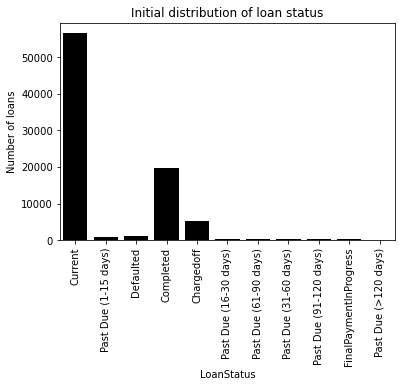

In [5]:
#Plot Initial Loan Status
plt.xticks(rotation=90)
plt.title('Initial distribution of loan status')
sb.countplot(data = analysis_df, x = 'LoanStatus', color = 'Black')
plt.ylabel('Number of loans');

In [6]:
# we will keep the defaulting, completed, and changedoff for our analysis.
loan_status_interest = (analysis_df['LoanStatus'] == 'Completed') | (analysis_df['LoanStatus'] == 'Defaulted') | (analysis_df['LoanStatus'] == 'Chargedoff')
analysis_df = analysis_df[loan_status_interest]

# define function to set chargedoff as defaulted
def change_status(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']

#Applying the function chage_to_defaulted to analysis_df
analysis_df['LoanStatus'] = analysis_df.apply(change_status, axis=1)

## Loans: Defaulted Vs Completed after Removing Current

> In this visualization we left only completed, defaulted listings while changing the changedoff to defaulted. 
> After wrangling there are 26005 loans in data set: 19664 completed loans and 6341 defaulted.

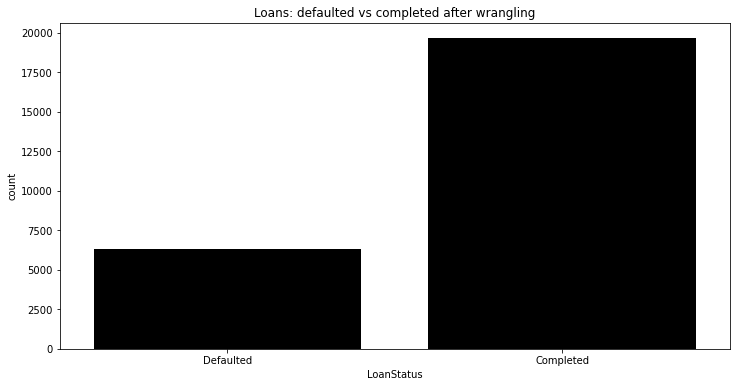

In [7]:
plt.figure(figsize=[12, 6])
plt.title('Loans: defaulted vs completed after wrangling')
sb.countplot(data = analysis_df, x = 'LoanStatus', color = 'Black');

## Loan Status and Prosper Rating

> In this visualization we have ordered the data and wrangled which shows the loan status with the prosper rating. 

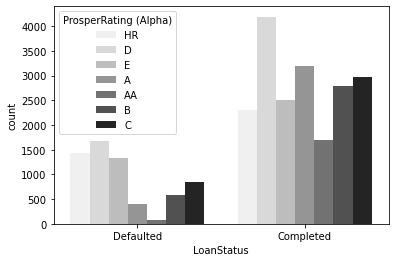

In [9]:
#Plot Loan Status and Prosper Rating
sb.countplot(data= analysis_df, x='LoanStatus', hue='ProsperRating (Alpha)', palette='Greys');

## Loan Status and Employment

> Individuals with employment status 'Not employed' or 'Self-employed' are more likely to default on credit 

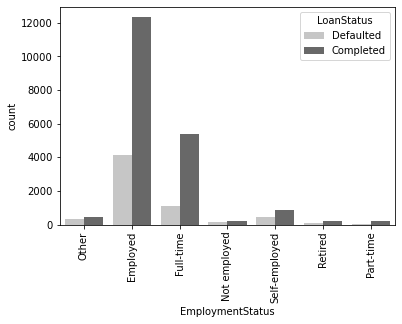

In [10]:
#Plot Loan Status and Employment status
plt.xticks(rotation = 90)
sb.countplot(data= analysis_df, x='EmploymentStatus', hue='LoanStatus', palette='Greys');

## Loan Status and Term

> Long-term (60 months) have the greatest proportion of defaulted credits.

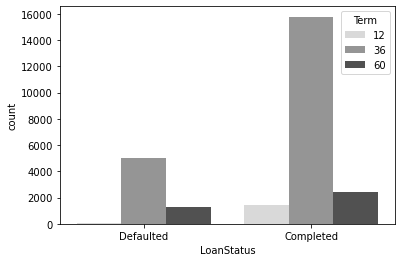

In [11]:
#Plot Loan Status with Term
sb.countplot(data= analysis_df, x='LoanStatus', hue='Term', palette='Greys');

In [12]:
#Add a new Feature for average credit score
analysis_df['AverageCreditScore'] = (analysis_df['CreditScoreRangeLower'] + analysis_df['CreditScoreRangeUpper'])/2
analysis_df.head()
#define function
def bin_creditscore(row):
    score = row['AverageCreditScore']
    if  score < 650:
        return 'up to 649'
    elif score < 700:
        return 'between 650 and 699'
    elif score < 750:
        return 'between 700 and 749'
    elif score < 800:
        return 'between 750 and 799'
    elif score < 850:
        return 'between 800 and 849'
    elif score < 900:
        return 'between 850 and 900'
#apply function and check 
analysis_df['CreditScoreBins'] = analysis_df.apply(bin_creditscore, axis=1)

## Credit Score with Loan Status 

> Most borrowers have an average rating of between 649.5 to 749.5.

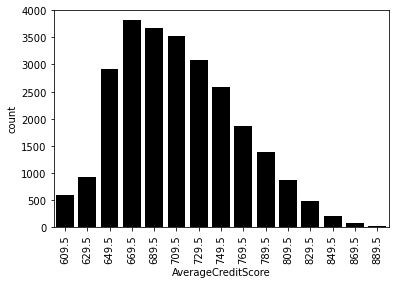

In [13]:
#Plot credit score average
plt.xticks(rotation=90)
sb.countplot(data= analysis_df, x='AverageCreditScore', color= 'Black');

##  Credit Score Bins with Loan Status

> The plot shows that between score 650 and 699 are the most prone to default. Also scores between 700 and 749 have not defaulted.

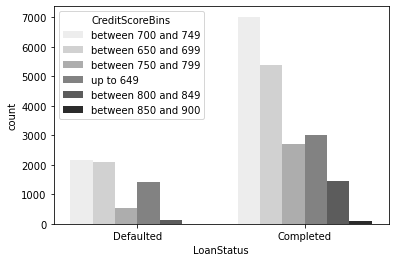

In [14]:
#Plot loan status with credit score bins
sb.countplot(data= analysis_df, x='LoanStatus', hue='CreditScoreBins', palette='Greys');